In [2]:
import pandas as pd
from datasets import load_dataset
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
import unicodedata
import string
from tokenizers import ByteLevelBPETokenizer
nltk.download('stopwords')
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Isabe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Isabe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Carregando e lendo o datasets:

In [3]:
dataset = load_dataset("ruanchaves/b2w-reviews01", split='train')
df = pd.DataFrame(dataset)
df.to_csv('./datasets/dataset.csv', index=False)


In [4]:
df.head()

,submission_date,reviewer_id,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_birth_year,reviewer_gender,reviewer_state
0,2018-01-01 00:11:28,d0fb1ca69422530334178f5c8624aa7a99da47907c44de...,132532965,Notebook Asus Vivobook Max X541NA-GO472T Intel...,None,Informática,Notebook,Bom,4,Yes,Estou contente com a compra entrega rápida o ú...,1958.0,F,RJ
1,2018-01-01 00:13:48,014d6dc5a10aed1ff1e6f349fb2b059a2d3de511c7538a...,22562178,Copo Acrílico Com Canudo 500ml Rocie,None,Utilidades Domésticas,"Copos, Taças e Canecas","Preço imbatível, ótima qualidade",4,Yes,"Por apenas R$1994.20,eu consegui comprar esse ...",1996.0,M,SC
2,2018-01-01 00:26:02,44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...,113022329,Panela de Pressão Elétrica Philips Walita Dail...,philips walita,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,4,Yes,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,1984.0,M,SP
3,2018-01-01 00:35:54,ce741665c1764ab2d77539e18d0e4f66dde6213c9f0863...,113851581,Betoneira Columbus - Roma Brinquedos,roma jensen,Brinquedos,Veículos de Brinquedo,presente mais que desejado,4,Yes,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,1985.0,F,SP
4,2018-01-01 01:00:28,7d7b6b18dda804a897359276cef0ca252f9932bf4b5c8e...,131788803,"Smart TV LED 43"" LG 43UJ6525 Ultra HD 4K com C...",lg,TV e Home Theater,TV,"Sem duvidas, excelente",5,Yes,"A entrega foi no prazo, as americanas estão de...",1994.0,M,MG


Extraindo apenas as colunas que serão utilizadas: reviewer_id', 'product_name', 'recommend_to_a_friend', 'review_text'

In [5]:
def extrair_coluna(arquivo_entrada, colunas_desejadas, arquivo_saida):

  df = pd.read_csv(arquivo_entrada)

  dados_coluna = df[colunas_desejadas]

  # Salva os dados em um novo arquivo CSV
  dados_coluna.to_csv(arquivo_saida, index=False)

arquivo_entrada = "./datasets/dataset.csv"

colunas_desejadas = [ 'product_name', 'overall_rating', 'review_text']
novo_arquivo = "./datasets/dataset_reduzido.csv"

extrair_coluna(arquivo_entrada, colunas_desejadas, novo_arquivo)

C:\Users\Isabe\AppData\Local\Temp\ipykernel_7292\4136324608.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(arquivo_entrada)


Prepocessamento:

In [6]:
def preprocess_text(text):
    # Convertendo letras maiúculas para minúsculas.
    text = text.lower()
    
    # Removendo acentos.
    text = ''.join(
        char for char in unicodedata.normalize('NFD', text)
        if unicodedata.category(char) != 'Mn'
    )
    # Removendo pontuações.
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Removendo stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    return text


stop_words = set(stopwords.words('portuguese'))
# Lista de colunas que serão pré-processadas
colunas_texto = [ 'product_name', 'overall_rating', 'review_text']


# Aplicando o pré-processamento em cada coluna de texto
for coluna in colunas_texto:
    df[coluna] = df[coluna].apply(lambda x: preprocess_text(str(x)))

# Salvando o DataFrame pré-processado em um novo arquivo CSV
df.to_csv('./datasets/dataset_preprocessed.csv', index=False)

C:\Users\Isabe\AppData\Local\Temp\ipykernel_7292\712668380.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./datasets/dataset_preprocessed.csv')


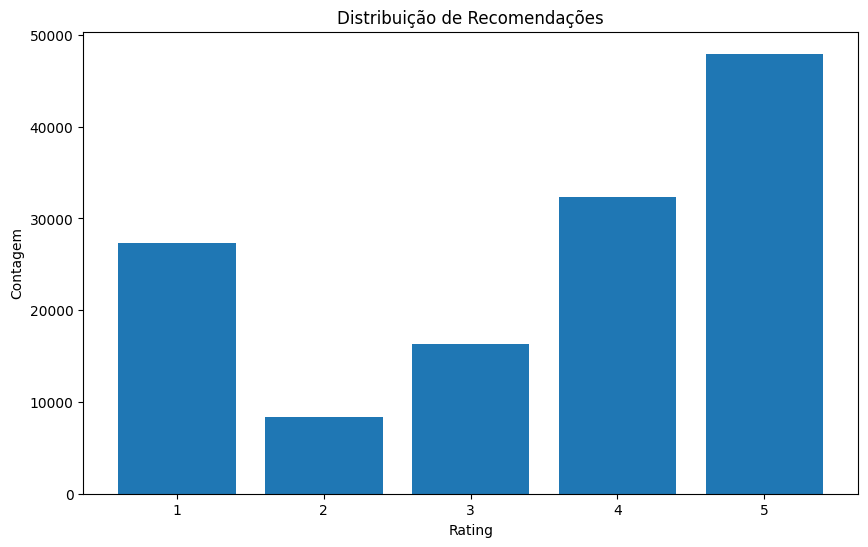

In [7]:
df = pd.read_csv('./datasets/dataset_preprocessed.csv')

# Obter os valores e contagem
values = df['overall_rating'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(values.index, values.values)

# Configurar os labels e título
plt.xlabel('Rating')
plt.ylabel('Contagem')
plt.title('Distribuição de Recomendações')

# Exibir o gráfico
plt.show()

In [8]:
df = pd.read_csv('./datasets/dataset_preprocessed.csv')
df.head(10)

C:\Users\Isabe\AppData\Local\Temp\ipykernel_7292\4139003647.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./datasets/dataset_preprocessed.csv')


,submission_date,reviewer_id,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_birth_year,reviewer_gender,reviewer_state
0,2018-01-01 00:11:28,d0fb1ca69422530334178f5c8624aa7a99da47907c44de...,132532965,notebook asus vivobook max x541nago472t intel ...,NaN,Informática,Notebook,Bom,4,Yes,contente compra entrega rapida unico problema ...,1958.0,F,RJ
1,2018-01-01 00:13:48,014d6dc5a10aed1ff1e6f349fb2b059a2d3de511c7538a...,22562178,copo acrilico canudo 500ml rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas","Preço imbatível, ótima qualidade",4,Yes,apenas r199420eu consegui comprar lindo copo a...,1996.0,M,SC
2,2018-01-01 00:26:02,44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...,113022329,panela pressao eletrica philips walita daily 5...,philips walita,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,4,Yes,supera agilidade praticidade outras panelas el...,1984.0,M,SP
3,2018-01-01 00:35:54,ce741665c1764ab2d77539e18d0e4f66dde6213c9f0863...,113851581,betoneira columbus roma brinquedos,roma jensen,Brinquedos,Veículos de Brinquedo,presente mais que desejado,4,Yes,filho amou parece verdade tantos detalhes,1985.0,F,SP
4,2018-01-01 01:00:28,7d7b6b18dda804a897359276cef0ca252f9932bf4b5c8e...,131788803,smart tv led 43 lg 43uj6525 ultra hd 4k conver...,lg,TV e Home Theater,TV,"Sem duvidas, excelente",5,Yes,entrega prazo americanas estao parabens smart ...,1994.0,M,MG
5,2018-01-01 01:27:23,28b1844e1cd24dd2288b7cafb052a0b46aed53ab28e1c1...,22562178,copo acrilico canudo 500ml rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas",Produto imperdível,5,Yes,excelente produto material acrilico super resi...,1979.0,M,PA
6,2018-01-01 01:54:38,48907a04d70947344017b351e8fc232bfc80dae2c33ac2...,22562178,copo acrilico canudo 500ml rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas",ótimo,5,Yes,produto mto bom garrafinha vc pode ate servir ...,NaN,NaN,NaN
7,2018-01-01 01:58:17,e039cbff059effe12756772b358af4323c2157e9561da8...,132444092,smartphone motorola moto g 5s dual chip androi...,NaN,Celulares e Smartphones,Smartphone,Gostei bastante do produto,4,Yes,produto excelente qualidade boa camera desenvo...,1987.0,M,GO
8,2018-01-01 02:02:13,a0fd1ad35b08d3b764ad6f884ef7183bf29fc7ebfcae65...,122776350,ventilador teto ventisol fenix premium branco ...,ventisol,Casa e Construção,Climatização,Gostei do produto,5,Yes,barulho minimo vento bem forte velocidade 2,1987.0,M,SP
9,2018-01-01 02:16:06,eb1cceab541aac33c21f2c2503b8a529d07a9837f8eec7...,23474928,kit 10 pecas fita led 12v 5050 300 leds rgb fonte,NaN,Casa e Construção,Iluminação,NÃO RECEBI O PRODUTO,1,No,produto nao entregue americanas descontando fa...,1984.0,M,RJ
